# Real Estate Price Prediction

## Problem Statement
The objective of this project is to build a machine learning model that predicts residential real estate prices
based on property characteristics such as total square footage, number of bedrooms (BHK), bathrooms, and location.

The model is designed to support real-time inference and deployment as a REST API for production use.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [5]:
from google.colab import files
files.upload()


Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


{'Bengaluru_House_Data.csv': b'area_type,availability,location,size,society,total_sqft,bath,balcony,price\r\nSuper built-up  Area,19-Dec,Electronic City Phase II,2 BHK,Coomee ,1056,2,1,39.07\r\nPlot  Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120\r\nBuilt-up  Area,Ready To Move,Uttarahalli,3 BHK,,1440,2,3,62\r\nSuper built-up  Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95\r\nSuper built-up  Area,Ready To Move,Kothanur,2 BHK,,1200,2,1,51\r\nSuper built-up  Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2,1,38\r\nSuper built-up  Area,18-May,Old Airport Road,4 BHK,Jaades ,2732,4,,204\r\nSuper built-up  Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4,,600\r\nSuper built-up  Area,Ready To Move,Marathahalli,3 BHK,,1310,3,1,63.25\r\nPlot  Area,Ready To Move,Gandhi Bazar,6 Bedroom,,1020,6,,370\r\nSuper built-up  Area,18-Feb,Whitefield,3 BHK,,1800,2,2,70\r\nPlot  Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5,3,295\r\nSuper built-up  Area,Rea

In [6]:
df1 = pd.read_csv("/content/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df1.shape

(13320, 9)

## Data Understanding
- The dataset contains residential property listings with numerical and categorical features.
- Key features include total square footage, number of bedrooms, number of bathrooms, and location.
- The target variable is property price.


In [8]:
df1.groupby("area_type")["area_type"].agg("count")

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [9]:
df2  = df1.drop(["availability", "society", "area_type", "balcony"], axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [11]:
df3 = df2.dropna()

In [12]:
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [13]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3["bhk"]  = df3["size"].apply(lambda x : int(x.split(" ")[0]))
df3.head()

/tmp/ipython-input-1499531960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"]  = df3["size"].apply(lambda x : int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [16]:
df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df3.loc[4684]

,4684
location,Munnekollal
size,43 Bedroom
total_sqft,2400
bath,40.0
price,660.0
bhk,43


In [18]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def is_float(x) :
    try :
        float(x)
    except :
        return False
    return True

In [20]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
def convert_range_to_float(x):
    if isinstance(x, str):
        if "-" in x:
            numbers = x.split("-")
            try:
                return (float(numbers[0]) + float(numbers[1])) / 2
            except:
                return None
        try:
            return float(x)
        except:
            return None
    elif isinstance(x, (int, float)):
        return float(x)
    else:
        return None


In [22]:
convert_range_to_float("34")

34.0

In [23]:
df3["total_sqft"] = df3["total_sqft"].apply(convert_range_to_float)
df4 = df3
df4.head()

/tmp/ipython-input-951880105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["total_sqft"] = df3["total_sqft"].apply(convert_range_to_float)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [24]:
df5 = df4.copy()
df5["price_per_sqft"]  = round(df5["price"]*100000 / df5["total_sqft"], 2)
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [25]:
len(df5.location.unique())

1304

In [26]:
df5.location  = df5.location.apply(lambda x : x.strip())

In [27]:
location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending = False)
location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
poornaprajna layout,1
pavitra paradise,1
near Ramanashree California resort,1


In [28]:
len(location_stats[location_stats<10])

1039

In [29]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
Kalkere,10
Sadashiva Nagar,10
BTM 1st Stage,10
Basapura,10
Gunjur Palya,10
...,...
poornaprajna layout,1
pavitra paradise,1
near Ramanashree California resort,1


In [30]:
len(df5.location.unique())

1293

In [31]:
df5.location = df5.location.apply(lambda x : "other" if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [32]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.86
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.06
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.82
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.24
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.51


In [33]:
df5[df5.total_sqft/df5.bhk <300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.00
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.43
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.33
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.91
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.93


In [34]:
df6 = df5[~(df5.total_sqft/df5.bhk <300)]
df6.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [35]:
df6.shape

(12502, 7)

In [36]:
df6.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', '7th Phase JP Nagar', 'Gottigere',
       'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'other', 'Kengeri', 'Binny Pete',
       'Thanisandra', 'Bellandur', 'Electronic City', 'Ramagondanahalli',
       'Yelahanka', 'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'Doddathoguru', 'KR Puram',
       'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road', 'Varthur',
       'Bommanahalli', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - Attibele Road',
       'Yeshwanthpur', 'Chandapura', 'Nagarbhavi',

In [38]:
df6.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6308.502836
std,4168.127366
min,267.830000
25%,4210.530000
50%,5294.120000
75%,6916.670000
max,176470.590000


In [39]:

def remove_pps_outliers (df) :
    df_out  = pd.DataFrame()
    for key, subdf in df.groupby("location") :
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out  =  pd.concat([df_out , reduced_df], ignore_index = True)
    return df_out

# # Function to remove outliers from price_per_sqft by location
# def remove_pps_outliers(df):
#     df_out = pd.DataFrame()  # DataFrame to store filtered data

#     # Group by location
#     for key, subdf in df.groupby("location"):
#         m = np.mean(subdf.price_per_sqft)  # Calculate mean for each location
#         st = np.std(subdf.price_per_sqft)  # Calculate standard deviation for each location

#         # Apply filtering for outliers based on the threshold
#         lower_limit = m - st
#         upper_limit = m + st

#         reduced_df = subdf[(subdf.price_per_sqft >= lower_limit) & (subdf.price_per_sqft <= upper_limit)]

#         # Concatenate reduced data back into the output DataFrame
#         df_out = pd.concat([df_out, reduced_df], ignore_index=True)

#     return df_out

In [40]:
df7 = remove_pps_outliers (df6)
df7.shape

(10241, 7)

## Data Cleaning
- Removed records with missing or invalid values to ensure data quality.
- Converted non-numeric square footage entries into numerical format.
- Filtered out extreme outliers to improve model stability.

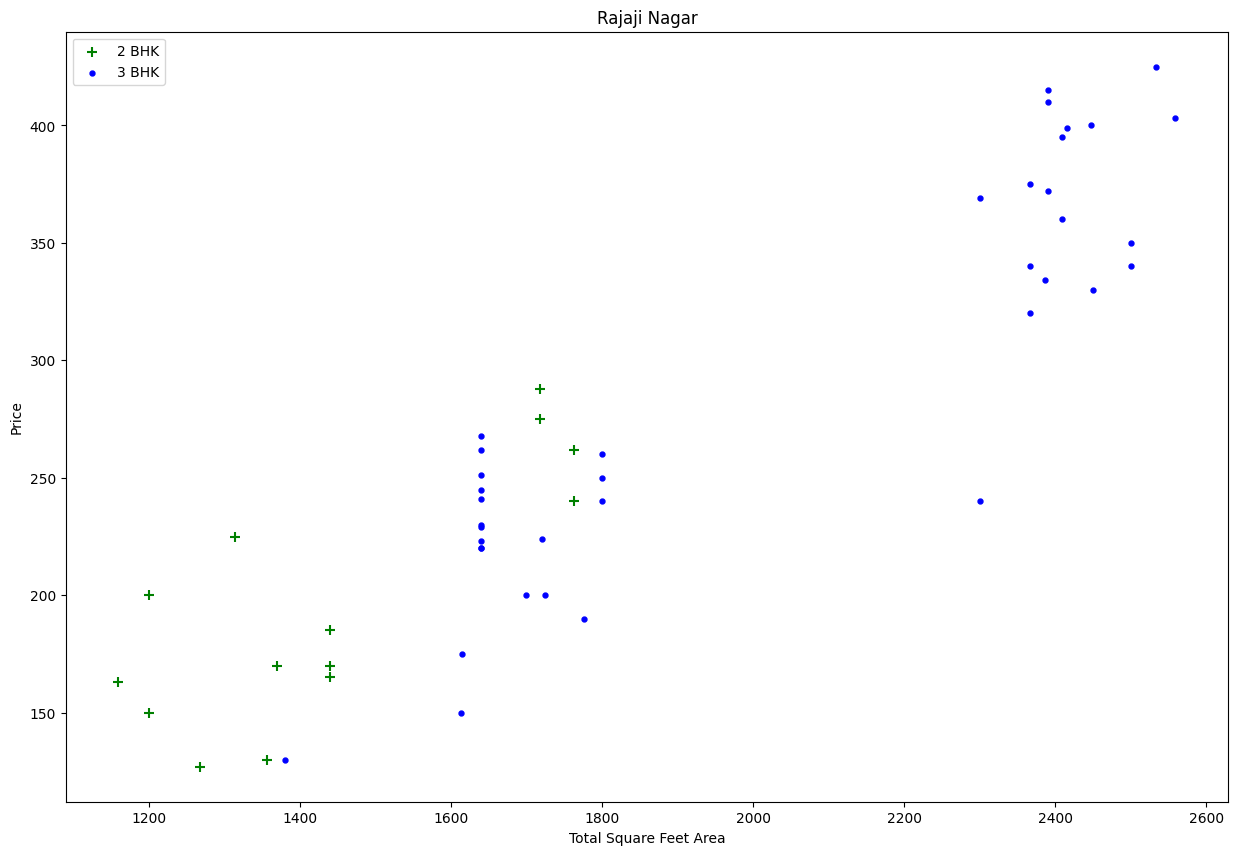

In [41]:
def plot_scatter_chart (df , location) :
    bhk2  = df[(df.location == location) & (df.bhk == 2)]
    bhk3  = df[(df.location == location) &( df.bhk == 3)]
    matplotlib.rcParams ["figure.figsize"]  = (15,10)
    plt.scatter (bhk2.total_sqft,bhk2.price , marker = "+" , s = 50 , color  = "green", label = "2 BHK" )
    plt.scatter (bhk3.total_sqft,bhk3.price , marker = "." , s = 50 , color  = "blue", label = "3 BHK" )
    plt.xlabel ("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7,'Rajaji Nagar')



In [42]:
def remove_bhk_outliers(df):
    # Initialize an empty list to store the indices of properties to exclude
    exclude_indices = np.array([])

    # Group data by 'location'
    for location, location_df in df.groupby('location'):

        # Create a dictionary to store statistics (mean, std, count) for each BHK in the location
        bhk_stats = {}

        # Group data by 'bhk' (bedroom count) and calculate mean, std, and count for price_per_sqft
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),  # Calculate mean of price_per_sqft
                'std': np.std(bhk_df.price_per_sqft),    # Calculate standard deviation of price_per_sqft
                'count': bhk_df.shape[0]                 # Count the number of properties
            }

        # For each BHK, check for outliers in comparison to the mean of the 1 BHK apartments
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)  # Get stats for the previous BHK (e.g., for 2 BHK, get 1 BHK stats)

            if stats and stats['count'] > 5:  # Only proceed if 1 BHK has enough data
                # Identify properties whose price_per_sqft is less than the mean price_per_sqft of 1 BHK
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)

    # Drop the rows of the identified outliers from the dataframe
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

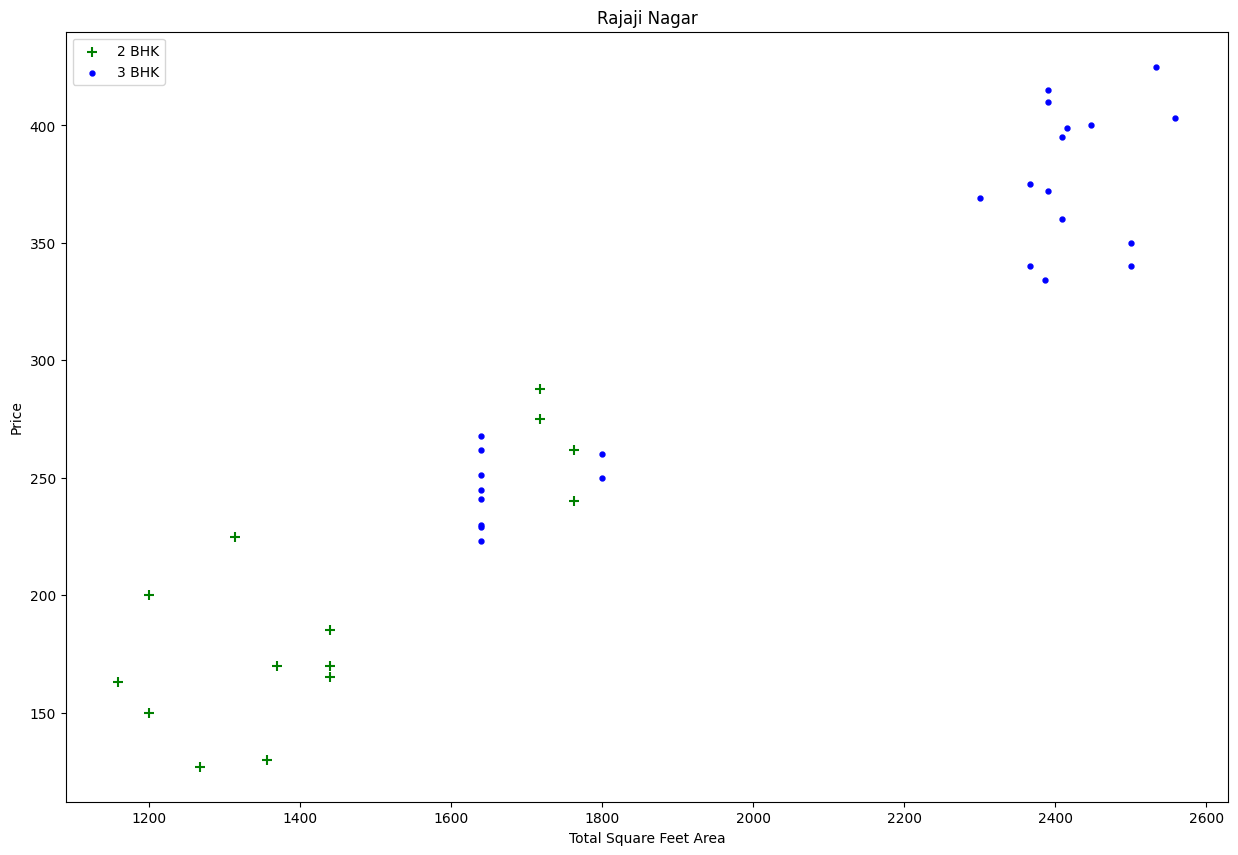

In [43]:
plot_scatter_chart(df8,'Rajaji Nagar')

Text(0, 0.5, 'Count')

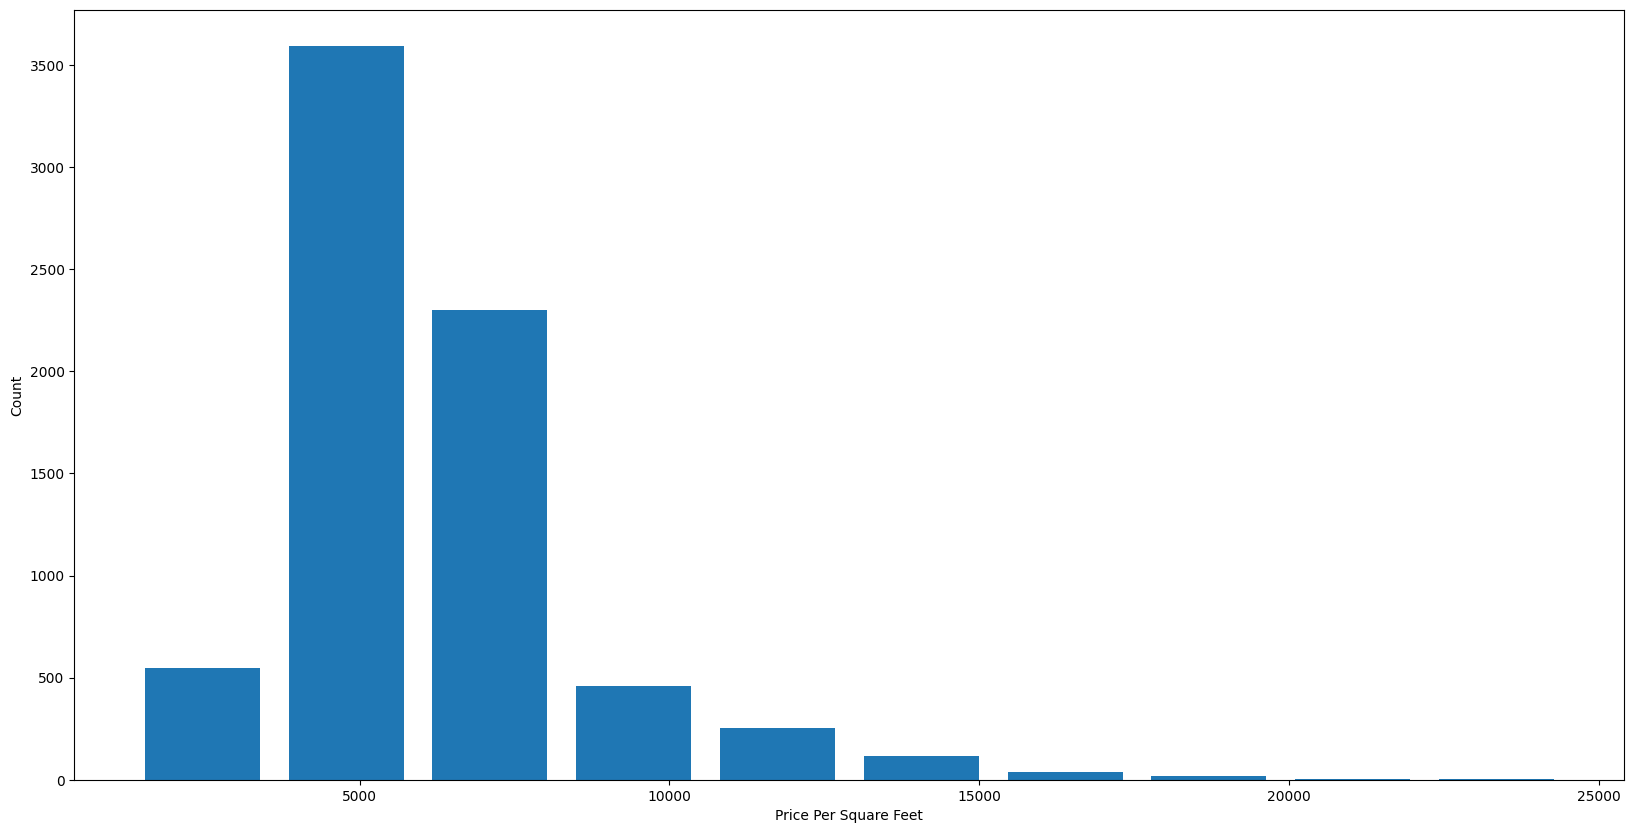

In [44]:
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

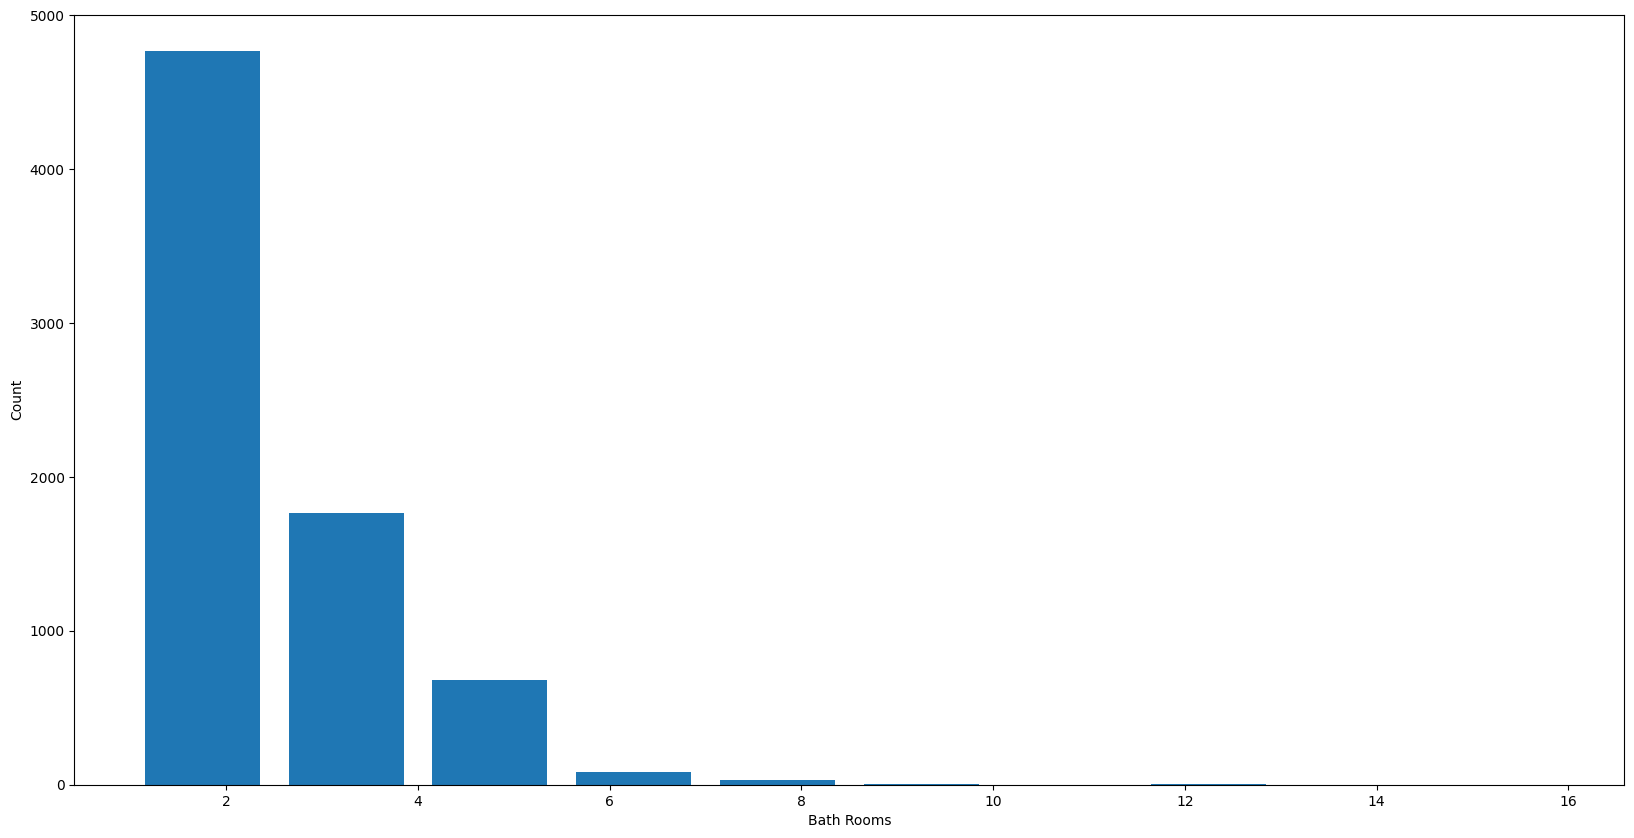

In [45]:
plt.hist(df8.bath, rwidth = 0.8)
plt.xlabel("Bath Rooms")
plt.ylabel ("Count")

In [46]:
df8[df8.bath > df8.bhk +2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.57
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.90


In [47]:
df9 = df8[~(df8.bath > df8.bhk +2)]
df9.shape

(7325, 7)

In [48]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81


In [49]:
df10  = df9.drop(["size", "price_per_sqft"], axis =1)

In [50]:
df10.head(2)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3


In [51]:
dummies = pd.get_dummies(df10.location)
dummies.shape

(7325, 242)

In [52]:
df11 = pd.concat([df10, dummies.drop("other", axis = 1)], axis = 1)
df11.shape

(7325, 246)

In [53]:
df12 = df11.drop("location" , axis = 1)
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
df12.shape

(7325, 245)

## Feature Engineering
- Applied one-hot encoding to the location feature, resulting in 240+ binary location features.
- Combined numerical and encoded categorical features into a single feature matrix.
- Prepared feature columns for consistent inference during deployment.


In [55]:
X = df12.drop("price", axis = 1)
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
y= df12.price
y.head()

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name} | R2: {r2_score(y_test, preds):.3f} | MAE: {mean_absolute_error(y_test, preds):.3f}")


Linear Regression | R2: 0.811 | MAE: 19.641
Decision Tree | R2: 0.508 | MAE: 23.912
Random Forest | R2: 0.676 | MAE: 21.276


## Model Selection Rationale
Although tree-based models were evaluated, linear regression achieved the highest
cross-validated R² score and demonstrated stable generalization performance.
Therefore, linear regression was selected as the final model for deployment.


In [59]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8111849311776098

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, train_size=0.8, test_size=.2,random_state=0)
cross_val_score(LinearRegression() , X, y, cv = cv)

array([0.85435491, 0.83563607, 0.82369758, 0.84409753, 0.81649097])

In [61]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd

def get_best_model_using_grid_search_cv(X, y):
    algos = {
        "linear_regression": {
            "model": LinearRegression(),
            "params": {
                "fit_intercept": [True, False]
            }
        },
        "lasso": {
            "model": Lasso(),
            "params": {
                "alpha": [1, 2],
                "selection": ["random", "cyclic"]
            }
        },
        "decision_tree": {
            "model": DecisionTreeRegressor(),
            "params": {
                "criterion": ["squared_error", "friedman_mse"] ,
                "splitter": ["best", "random"]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X, y)

        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })

    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

get_best_model_using_grid_search_cv(X, y)


,model,best_score,best_params
0,linear_regression,0.835319,{'fit_intercept': False}
1,lasso,0.684330,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.744253,"{'criterion': 'squared_error', 'splitter': 'be..."


In [62]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [63]:
loc_index = np.where(X.columns== "1st Phase JP Nagar") [0][0]
loc_index

np.int64(4)

In [64]:
x = np.zeros(len(X.columns))
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [65]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    x_df = pd.DataFrame([x], columns=X.columns)
    return lr_clf.predict(x_df)[0]



In [66]:
predict_price("1st Phase JP Nagar", 1000, 2,2)

np.float64(95.02762700605754)

In [67]:
predict_price("1st Phase JP Nagar", 1000, 3,3)

np.float64(95.26642621597053)

In [68]:
predict_price("Indira Nagar", 1000, 2,2)

np.float64(177.69245504199452)

In [69]:
predict_price("Indira Nagar", 1000, 3,3)

np.float64(177.93125425190752)

In [76]:
import pickle
with open("real_state_price_prediction.pickle", "wb") as file :
    pickle.dump(lr_clf ,file)

In [77]:
import json
# columns= {
#    "data_columns" : [col.lower() for col in X.columns]
# }
# with open("columns.json", "w") as f :
#     json.dump(columns, f)

columns = {
    "data_columns": list(X.columns)
}

with open("columns.json", "w") as f:
    json.dump(columns, f)
